In [ ]:
# Importing necessary libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
# Reading the dataset
df=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# There are 50k reviews of movies.
df.shape

(50000, 2)

In [ ]:
# It's a balanced distribution of both sentiments
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
df['sentiment'] = df['sentiment'].map({'positive' : 1, 'negative': 0})

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df_temp = df.copy()

In [ ]:
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_temp['review'] = df_temp['review'].str.lower()
df_temp['review'] =  df_temp['review'].apply(lambda x: re.sub(r'\W+|\d+|(br)',' ', str(x)))
df_temp['review'] = df_temp['review'].apply(lambda x: x.rstrip())
df_temp['review'] = df_temp['review'].apply(lambda x : ' '.join([w for w in x.split() if not w in stop_words]))

In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
df_temp['review'][0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz utality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills 

In [ ]:
corpus = ' '.join(df_temp['review'].tolist())
word_dist = nltk.FreqDist(corpus.split())

In [ ]:
for i in [1000,5000,7500,10000,12000,15000,20000]:
    most_words = word_dist.most_common(i)
    print('Percentage of Corpus captured with %s words is %.2f'%(i,np.sum([int(x[1]) for x in most_words]) / len(corpus.split()) * 100 ))

Percentage of Corpus captured with 1000 words is 57.38
Percentage of Corpus captured with 5000 words is 82.00
Percentage of Corpus captured with 7500 words is 86.86
Percentage of Corpus captured with 10000 words is 89.84
Percentage of Corpus captured with 12000 words is 91.52
Percentage of Corpus captured with 15000 words is 93.36
Percentage of Corpus captured with 20000 words is 95.33



**We will choose 12,000 vocab size for our corpus.**

Estimating the length of vector..

In [ ]:
df_temp.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1


In [ ]:
len(df_temp['review'][0].split())

162

In [ ]:
corpus_list = df_temp['review'].tolist()

In [ ]:
len_review = []
for i in corpus_list:
    len_review.append(len(i.split()))

In [ ]:
len_review = np.array(len_review)

In [ ]:
print('Average Length of Review:', np.mean(len_review))
print('Std Deviation of Reviews:', np.std(len_review))

Average Length of Review: 118.12304
Std Deviation of Reviews: 89.39626648332914


In [ ]:
mean = np.mean(len_review)
std = np.std(len_review)

for i in range(3):
    print('Percentage of Reviews less than or equal to mean + %s standard dev: %.2f'%(i,len(len_review[len_review <= np.mean(len_review) + i * np.std(len_review)]) / len(len_review)))

Percentage of Reviews less than or equal to mean + 0 standard dev: 0.67
Percentage of Reviews less than or equal to mean + 1 standard dev: 0.87
Percentage of Reviews less than or equal to mean + 2 standard dev: 0.95


87% of reviews are less than mean + 1 std dev length, which will be our optimal length of vector.



In [ ]:
print('Length of Vector is', np.round(mean+std,2))

Length of Vector is 207.52


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2)

In [ ]:
X_train.shape, X_test.shape

((40000,), (10000,))

In [ ]:
# Load data using tf.data.Dataset

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
for feat, targ in train_dataset.take(1):
  print('text: ', feat.numpy())
  print('label: ', targ.numpy())

text:  b'I remember being so excited on Saturday nights when I was a kid, waiting for Dr. Who. I thought it was the best show ever made. Then, I grew up, Dr. Who went off the air, and no one I knew had ever heard of it. Then I found out there was going to be a new series. I was a little nervous about it. Was it going to live up to the expectations I had carried around since I was little? Would they screw it up? Would the Dr. suck? Would his assistant suck? Would they create a more intimate relationship with the Dr. and his assistant? YES, NO, NO, NO, NO!!! This show is wonderful!! I love the new Dr. I love his assistant. I love the show. And I find myself excited on Friday nights now, waiting for the "new" episode. I\'m just now seeing 2005 episodes, as I live in the States, so I\'m a little behind the rest of you. I hope the next Dr. is as great as this one!'
label:  1


In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 512

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
VOCAB_SIZE = 5000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens = VOCAB_SIZE, standardize = 'lower_and_strip_punctuation',
    output_mode = 'int', output_sequence_length = 200,
)

In [ ]:
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b"Were it not for the fact that this came as a 2-dvd set paired with the original American Graffiti; were it not for the fact that I've been here in Iraq for several months and, at this point, will watch pretty much anything, I would have tossed this movie in the garbage after the first ten minutes. This movie was appallingly bad on so many levels I just don't know where to start. Poorly acted, shot, directed, written, scored, edited. My 9-year old daughter's first forays into film-making are superior to this - and she was filming the dog sleeping. (Come to think of it, I give that piece of cinematography 9 stars. But I'm biased.) If you have even the slightest appreciation for quality film-making, then avoid this piece of garbage at all costs. No character in this movie has a single redeeming quality save for the Icelandic girl who doesn't even have a single line in English. I'll not waste more of my time describing what a bad movie this is."
 b"A woman in love with her husba

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  67,    9,   22,   17,    2,  188,   12,   11,  371,   15,    4,
           1,  275,    1,   16,    2,  209,  305,    1,   67,    9,   22,
          17,    2,  188,   12,  195,   75,  136,    8, 4976,   17,  420,
        1795,    3,   31,   11,  222,   79,  104,  180,   73,  235,   10,
          59,   26,    1,   11,   18,    8,    2, 1212,  100,    2,   88,
         734,  233,   11,   18,   14,    1,   83,   21,   38,  105, 2153,
          10,   41,   89,  116,  115,    6,  366,  861,  978,  317,  525,
         429,    1, 2037,   54,    1,  169, 2387,   88,    1,   82, 1560,
          24, 1695,    6,   11,    3,   58,   14, 1352,    2,  850, 2747,
         210,    6,  103,    5,    9,   10,  192,   12,  408,    5,  620,
        1347,  410,   19,  141,    1,   44,   23,   26,   55,    2, 4136,
        4777,   17,  485, 1560,   91,  797,   11,  408,    5, 1212,   31,
          32, 2340,   56,  107,    8,   11,   18,   45,    4,  680, 1672,
         485,  553,   17,    2,    1, 

In [ ]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b"Were it not for the fact that this came as a 2-dvd set paired with the original American Graffiti; were it not for the fact that I've been here in Iraq for several months and, at this point, will watch pretty much anything, I would have tossed this movie in the garbage after the first ten minutes. This movie was appallingly bad on so many levels I just don't know where to start. Poorly acted, shot, directed, written, scored, edited. My 9-year old daughter's first forays into film-making are superior to this - and she was filming the dog sleeping. (Come to think of it, I give that piece of cinematography 9 stars. But I'm biased.) If you have even the slightest appreciation for quality film-making, then avoid this piece of garbage at all costs. No character in this movie has a single redeeming quality save for the Icelandic girl who doesn't even have a single line in English. I'll not waste more of my time describing what a bad movie this is."
Round-trip:  were it not for th

In [ ]:
from tensorflow.keras.layers import Bidirectional,LSTM, Dense, Embedding, Dropout, GlobalAveragePooling1D

In [ ]:
model = tf.keras.Sequential([
    encoder,
    Embedding(input_dim=len(encoder.get_vocabulary()), output_dim= 256, mask_zero=True),
    GlobalAveragePooling1D(),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(1, activation = 'sigmoid')])

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001), 
              loss = tf.keras.losses.BinaryCrossentropy(from_logits= False), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=5)

Epoch 1/10
79/79 [==============================] - 14s 168ms/step - loss: 0.6450 - accuracy: 0.6699 - val_loss: 0.3630 - val_accuracy: 0.8395
Epoch 2/10
79/79 [==============================] - 15s 186ms/step - loss: 0.3357 - accuracy: 0.8565 - val_loss: 0.2999 - val_accuracy: 0.8715
Epoch 3/10
79/79 [==============================] - 13s 169ms/step - loss: 0.2704 - accuracy: 0.8894 - val_loss: 0.2890 - val_accuracy: 0.8781
Epoch 4/10
79/79 [==============================] - 14s 177ms/step - loss: 0.2533 - accuracy: 0.8973 - val_loss: 0.2884 - val_accuracy: 0.8754
Epoch 5/10
79/79 [==============================] - 14s 176ms/step - loss: 0.2419 - accuracy: 0.9033 - val_loss: 0.2956 - val_accuracy: 0.8746
Epoch 6/10
79/79 [==============================] - 14s 181ms/step - loss: 0.2337 - accuracy: 0.9069 - val_loss: 0.2961 - val_accuracy: 0.8762
Epoch 7/10
79/79 [==============================] - 15s 187ms/step - loss: 0.2223 - accuracy: 0.9122 - val_loss: 0.3053 - val_accuracy: 0.8754

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

20/20 [==============================] - 2s 110ms/step - loss: 0.3398 - accuracy: 0.8622
Loss:  0.33981040120124817
Accuracy:  0.8622000217437744


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

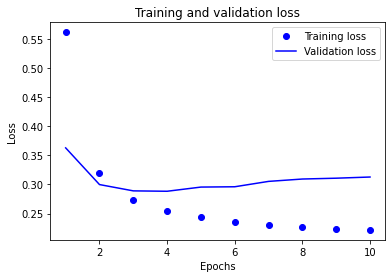

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

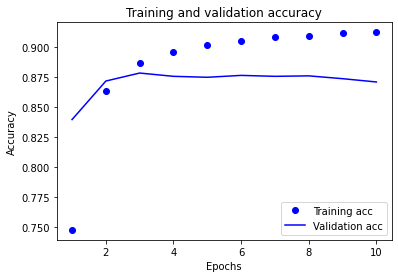

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
example = ['GODZILLA VS. KONG is laced with a great story and buildup and the climax battle between the monsters is amazing',
          'The movie was terrible']

In [ ]:
model.predict(example)

array([[9.9999785e-01],
       [1.1029362e-13]], dtype=float32)

In [ ]:
import os
path="/content/drive/MyDrive/TextFiles"
os.chdir(path)

In [ ]:
model.save('tf_keras_imdb')

INFO:tensorflow:Assets written to: tf_keras_imdb/assets


In [ ]:
exported_model = tf.keras.models.load_model('tf_keras_imdb/')

In [ ]:
exported_model.predict(['GODZILLA VS. KONG is laced with a great story and buildup and the climax battle between the monsters is amazing'])

array([[0.9999978]], dtype=float32)